In [10]:
from openai import OpenAI
from dotenv import load_dotenv

load_dotenv()

client = OpenAI()

# from dotenv import load_dotenv

# load_dotenv()
# openai.api_key = dotenv_values("../.env")["OPENAI_API_KEY"]

### OpenAI API Testing

##### JSON output

In [46]:
completion = client.chat.completions.create(
   model="gpt-4-turbo-preview",
   messages=[
      {"role": "system", "content": "JSON"},
      {"role": "user", "content": """Transform the string \"1. Hristo Stoichkov - works - TUDN\n2. Hristo Stoichkov - was named in - FIFA 100 by Pelé\n3. Hristo Stoichkov - played for - CSKA-Sofia\"
       into a JSON object.
       ---
       schema:
       {
         "relationships": \{\"src\", \"relationship\", \"tgt\"\}[]
       }
       """}
   ],
   response_format={"type": "json_object"}, # enable JSON mode - the model is constrained to only generate strings that parse into valid JSON object
   max_tokens=256,
   n = 1
)

print(completion.choices[0].message.content)
# print(completion.choices[1].message.content)

# Parse the GPT API output (string to dict)
import ast
a = completion.choices[0].message.content
if completion.choices[0].finish_reason == 'length':
   # Double the max_tokens length and re-run the query
   print("Exceeded token limit")
else:
   a = ast.literal_eval(a) # dict
   print(a)

# try:
#    a = ast.literal_eval(a) # dict
#    print(a)
# except:
#    raise Exception("Exceeded token limit")

{
  "relationships": [
    {
      "src": "Hristo Stoichkov",
      "relationship": "works",
      "tgt": "TUDN"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "was named in",
      "tgt": "FIFA 100 by Pelé"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "played for",
      "tgt": "CSKA-Sofia"
    }
  ]
}
{'relationships': [{'src': 'Hristo Stoichkov', 'relationship': 'works', 'tgt': 'TUDN'}, {'src': 'Hristo Stoichkov', 'relationship': 'was named in', 'tgt': 'FIFA 100 by Pelé'}, {'src': 'Hristo Stoichkov', 'relationship': 'played for', 'tgt': 'CSKA-Sofia'}]}


##### Python lists output

In [26]:
completion = client.chat.completions.create(
   model="gpt-4-turbo-preview",
   messages=[
      {"role": "system", "content": ""},
      {"role": "user", "content": """Transform the string \"1. Hristo Stoichkov - works - TUDN\n2. Hristo Stoichkov - was named in - FIFA 100 by Pelé\n3. Hristo Stoichkov - played for - CSKA-Sofia\"
       into a list of tuples. Each tuples should have 3 elements of type string. Only output a Python list."""}
   ],
   max_tokens=100,
   n = 2
)

print(completion.choices[0].message.content)
print(completion.choices[1].message.content)

# Parse Python lists from the GPT API output
import ast

a = completion.choices[0].message.content
a = a.replace("```python", "").replace("```", "").strip()
a = ast.literal_eval(a)
a

```python
[
("Hristo Stoichkov", "works", "TUDN"),
("Hristo Stoichkov", "was named in", "FIFA 100 by Pelé"),
("Hristo Stoichkov", "played for", "CSKA-Sofia")
]
```
```python
[
    ("1. Hristo Stoichkov", "works", "TUDN"),
    ("2. Hristo Stoichkov", "was named in", "FIFA 100 by Pelé"),
    ("3. Hristo Stoichkov", "played for", "CSKA-Sofia"),
]
```


[('Hristo Stoichkov', 'works', 'TUDN'),
 ('Hristo Stoichkov', 'was named in', 'FIFA 100 by Pelé'),
 ('Hristo Stoichkov', 'played for', 'CSKA-Sofia')]

##### Compare the Length in Tokens (Number of Tokens) of the JSON and List Approaches

In [2]:
from numTokens import numTokensStr

json = """{
  "relationships": [
    {
      "src": "Hristo Stoichkov",
      "relationship": "works",
      "tgt": "TUDN"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "was named in",
      "tgt": "FIFA 100 by Pelé"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "played for",
      "tgt": "CSKA-Sofia"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "works",
      "tgt": "TUDN"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "was named in",
      "tgt": "FIFA 100 by Pelé"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "played for",
      "tgt": "CSKA-Sofia"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "works",
      "tgt": "TUDN"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "was named in",
      "tgt": "FIFA 100 by Pelé"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "played for",
      "tgt": "CSKA-Sofia"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "works",
      "tgt": "TUDN"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "was named in",
      "tgt": "FIFA 100 by Pelé"
    },
    {
      "src": "Hristo Stoichkov",
      "relationship": "played for",
      "tgt": "CSKA-Sofia"
    },
  ]
}"""
array = """```python
[
("Hristo Stoichkov", "works", "TUDN"),
("Hristo Stoichkov", "was named in", "FIFA 100 by Pelé"),
("Hristo Stoichkov", "played for", "CSKA-Sofia"),
("Hristo Stoichkov", "works", "TUDN"),
("Hristo Stoichkov", "was named in", "FIFA 100 by Pelé"),
("Hristo Stoichkov", "played for", "CSKA-Sofia"),
("Hristo Stoichkov", "works", "TUDN"),
("Hristo Stoichkov", "was named in", "FIFA 100 by Pelé"),
("Hristo Stoichkov", "played for", "CSKA-Sofia"),
("Hristo Stoichkov", "works", "TUDN"),
("Hristo Stoichkov", "was named in", "FIFA 100 by Pelé"),
("Hristo Stoichkov", "played for", "CSKA-Sofia"),
]
```"""

print(numTokensStr(array))
print(numTokensStr(json))

234
429


##### Stream Test

In [27]:
stream = client.chat.completions.create(
   model="gpt-3.5-turbo-0125",
   messages=[{"role": "user", "content": "Say this is a test"}],
   stream=True,
)

for chunk in stream:
   if chunk.choices[0].delta.content is not None:
      print(chunk.choices[0].delta.content, end="")



This is a test.

### Query Processing

In [19]:
query = str(input("Input (text): "))
print(query)

Yigit Ihlamur


##### Expand the query for more accurate results

In [36]:
# Maybe add "person" or "company"/"organisation" to the query
def expand_query(query):
   synonyms = ["job title", "works at", "associated with"]  # Expand this
   expanded_queries = [query + " " + synonym for synonym in synonyms]
   return expanded_queries 

##### Additional Optional Input /or/ the LLM asks the user a clarifying question about the type of relationships wanted /or/ (initially) the LLM asks follow-up questions about more specific important relationships: e.g. where is X located, were does X work, who does X work with, who is the founder of X, etc.
- This guides/directs the LLM to be more precise and accurate

### Data Retrieval
- bing
- crunchbase
- beautifulSoup

##### Bing Search API Testing

In [20]:
import requests
import os 
from pprint import pprint

# os.environ["..."] / os.environ.get("...")
subscription_key = os.environ['BING_SEARCH_V7_SUBSCRIPTION_KEY']
endpoint = os.environ['BING_SEARCH_V7_ENDPOINT'] + "/v7.0/search"

# query = '"Hristo Stoichkov"'

# Construct a request
params = { 'q': f'"{query}"', 'mkt': 'en-US' } # "count": 10
headers = { 'Ocp-Apim-Subscription-Key': subscription_key }

# Call the API
try:
   response = requests.get(endpoint, headers=headers, params=params)
   response.raise_for_status()

   search_results = response.json()

   # print("Headers:")
   # print(response.headers)
   # print("JSON Response:")
   # pprint(search_results)

   for result in search_results["webPages"]["value"][:5]:
      print(f"{result['name']} - {result['url']}")

except Exception as ex:
   raise ex


Yiğit Ihlamur - Vela Partners | LinkedIn - https://www.linkedin.com/in/yihlamur
Yigit Ihlamur, Vela Partners LLC: Profile and Biography - https://www.bloomberg.com/profile/person/21639808
Yigit Ihlamur Profile: Contact Information & Network | PitchBook - https://pitchbook.com/profiles/person/193178-80P
VC Talks #1: Yigit Ihlamur, Vela Partners - Medium - https://medium.com/vc-talks/vc-talks-1-yigit-ihlamur-vela-partners-4223f4a8e807
Yigit Ihlamur Investor Profile: Portfolio & Exits | PitchBook - https://pitchbook.com/profiles/investor/432763-12


In [21]:
for result in search_results["webPages"]["value"][:5]:
   print(f"Name: {result['name']}\nURL: {result['url']}\nSnippet: {result['snippet']}\n")

Name: Yiğit Ihlamur - Vela Partners | LinkedIn
URL: https://www.linkedin.com/in/yihlamur
Snippet: work: vela.partners<br>personal: www.ihlamur.org · Experience: Vela Partners · Education: University of Oxford · Location: San Francisco Bay Area · 500+ connections on LinkedIn. View Yiğit ...

Name: Yigit Ihlamur, Vela Partners LLC: Profile and Biography
URL: https://www.bloomberg.com/profile/person/21639808
Snippet: Yigit Ihlamur is General Partner/Co-Founder at Vela Partners LLC. See Yigit Ihlamur's compensation, career history, education, & memberships.

Name: Yigit Ihlamur Profile: Contact Information & Network | PitchBook
URL: https://pitchbook.com/profiles/person/193178-80P
Snippet: Yigit Ihlamur General Information Biography. Mr. Yigit Ihlamur is a Co-Founder and serves as a General Partner at Vela Partners. He also serves as an Advisor at Incubate Fund US. He serves as Board Observer at Cartken and DagKnows. Prior to becoming a partner of Vela, he worked in Google's Cloud division

##### Bing Entity Search API Testing

In [22]:
subscription_key = os.environ['BING_SEARCH_V7_SUBSCRIPTION_KEY']
endpoint = os.environ['BING_SEARCH_V7_ENDPOINT'] + "/v7.0/entities"

# query = '"Hristo Stoichkov"'

# Construct a request
params = { 'q': f'"{query}"', 'mkt': 'en-US' } # "count": 10
headers = { 'Ocp-Apim-Subscription-Key': subscription_key }

# Call the API
try:
   response = requests.get(endpoint, headers=headers, params=params)
   response.raise_for_status()

   search_results_entities = response.json()

   if "entities" in search_results_entities:
      for entity in search_results_entities["entities"]["value"]:
         print(f"Name: {entity['name']}\nURL: {entity['webSearchUrl']}\nDescription: {entity['description']}\n")

except Exception as ex:
   # print(search_results_entities)
   raise ex

##### Web Scraping - BeautifulSoup

##### Combine Search Results

In [23]:
combined_search_results = ""

for result in search_results["webPages"]["value"][:5]:
   combined_search_results += f"{result['snippet']}\n\n"

if "entities" in search_results_entities:
   for entity in search_results_entities["entities"]["value"]:
      combined_search_results += f"{entity['description']}\n\n"

print(combined_search_results)

work: vela.partners<br>personal: www.ihlamur.org · Experience: Vela Partners · Education: University of Oxford · Location: San Francisco Bay Area · 500+ connections on LinkedIn. View Yiğit ...

Yigit Ihlamur is General Partner/Co-Founder at Vela Partners LLC. See Yigit Ihlamur's compensation, career history, education, & memberships.

Yigit Ihlamur General Information Biography. Mr. Yigit Ihlamur is a Co-Founder and serves as a General Partner at Vela Partners. He also serves as an Advisor at Incubate Fund US. He serves as Board Observer at Cartken and DagKnows. Prior to becoming a partner of Vela, he worked in Google's Cloud division, at the company's headquarters in ...

I’m very excited to have Yigit Ihlamur for the first ever episode. Yigit is the co-founder and general partner of Vela Partners.. Vela Partners is pioneering an innovative way of investing in ...

Yigit Ihlamur General Information Description. Mr. Yigit Ihlamur is a Co-Founder and serves as a General Partner at Vela 

### NLP processing - GPT

##### Plan

1. Summarize the search information - 128k context window so might not need it - however, it might be helpful if it helps the LLM to be more precise

2. Identify Entities - identify all unique entities related to X mentioned in the text. This includes organizations, awards, clubs, people, and other specific entities: "Given the text, identify all unique specific entities (organizations, awards, clubs, and teams) mentioned in relation to X."
3. Extract Relationships - once you have a list of entities, extract relationships between X and these entities. Clearly state the format of the relationships (with example) and the constraints for the relationships (e.g., maximum of two words, the relationship should be a verb or a noun): "For each entity identified related to X, extract the relationship between them and X. The relationship should be expressed in a maximum of two words, and the output format should be 'X - relationship - entity'. Focus on relationships where the entity is a specific organization, award, person, or professional affiliation."
   - Relationships can be between the Entities found and other entities in the text
4. Refinement (optional) - if the relationships extracted are too broad or not in the specified format, you can further refine the prompt to narrow down the responses or adjust the relationship descriptions: "Refine the previously extracted relationships to ensure they follow the specified format strictly 'X - relationship - entity' and the relationship is described in no more than two words. Simplify complex descriptions if necessary."
5. Follow-up Questions: "For the entity [Entity Name] related to X, identified from the provided information, describe the nature of the relationship in no more than two words, following the format 'X - [relationship] - [Entity Name].' Focus on specific organizations, awards, professional affiliations, etc."
   - !!! Important followw-up questions - for any of the discovered entities find if they have relationships to other entities in the provided information
6. Verify and Validate: "Verify the completeness and accuracy of the relationships extracted. If any relationship is missing or inaccurately described, correct it based on the information provided."
7. Remove Duplicates

In [ ]:
example_data = """Hristo Stoichkov Stoichkov is a Bulgarian former professional footballer who is a football commentator for TUDN. A prolific forward, he is regarded as one of the best forwards of all time, and as the greatest Bulgarian footballer of all time. He was runner-up for the FIFA World Player of the Year award in 1992 and 1994, and received the Ballon d'Or in 1994. In 2004, Stoichkov was named by Pelé in the FIFA 100 list of the world's greatest living players.

Transfermarkt provides detailed information on Hristo Stoichkov, a former left winger who played for CSKA-Sofia, Barcelona, D.C. United and the Bulgarian national team. See his stats, awards, career history, gallery and more."""

In [26]:
from nlpProcessing import extractRelationshipsDirectly, textToJson

_, output = extractRelationshipsDirectly(query=query, data=combined_search_results, model="gpt-4-turbo-preview")

relationships = textToJson(data=output.content, model="gpt-3.5-turbo")

print(relationships)


{
  "relationships": [
    {"src": "Yigit Ihlamur", "relationship": "works at", "tgt": "Vela Partners"},
    {"src": "Yigit Ihlamur", "relationship": "website", "tgt": "www.ihlamur.org"},
    {"src": "Yigit Ihlamur", "relationship": "educated at", "tgt": "University of Oxford"},
    {"src": "Yigit Ihlamur", "relationship": "located in", "tgt": "San Francisco Bay Area"},
    {"src": "Yigit Ihlamur", "relationship": "previous employer", "tgt": "Google"},
    {"src": "Yigit Ihlamur", "relationship": "advisor at", "tgt": "Incubate Fund US"},
    {"src": "Yigit Ihlamur", "relationship": "board observer at", "tgt": "Cartken"},
    {"src": "Yigit Ihlamur", "relationship": "board observer at", "tgt": "DagKnows"}
  ]
}


In [25]:
from nlpProcessing import extractEntities, extractRelationshipsFromEntities, textToJson

context, output = extractEntities(query=query, data=combined_search_results, model="gpt-4-turbo-preview")

context.append(output)

_, output = extractRelationshipsFromEntities(query=query, context=context, model="gpt-4-turbo-preview")

relationships = textToJson(data=output.content, model="gpt-3.5-turbo")

print(relationships)

{
  "relationships": [
    {"src": "Yigit Ihlamur", "relationship": "Co-Founder", "tgt": "Vela Partners"},
    {"src": "Yigit Ihlamur", "relationship": "General Partner", "tgt": "Vela Partners LLC"},
    {"src": "Yigit Ihlamur", "relationship": "Alumnus", "tgt": "University of Oxford"},
    {"src": "Yigit Ihlamur", "relationship": "Located in", "tgt": "San Francisco Bay Area"},
    {"src": "Yigit Ihlamur", "relationship": "Has connections on", "tgt": "LinkedIn"},
    {"src": "Yigit Ihlamur", "relationship": "Owns", "tgt": "www.ihlamur.org"},
    {"src": "Yigit Ihlamur", "relationship": "Advisor", "tgt": "Incubate Fund US"},
    {"src": "Yigit Ihlamur", "relationship": "Board Observer", "tgt": "Cartken"},
    {"src": "Yigit Ihlamur", "relationship": "Board Observer", "tgt": "DagKnows"},
    {"src": "Yigit Ihlamur", "relationship": "Former Employee", "tgt": "Google's Cloud division"}
  ]
}


### NLP Processing - spaCy

In [61]:
import spacy

# Load a pre-trained model
nlp = spacy.load("en_core_web_sm")
# nlp = spacy.load("en_core_web_trf") # for accuracy

def extract_entities(text):
   doc = nlp(text)
   entities = [(ent.text, ent.label_, ent.root.head) for ent in doc.ents if ent.root.head.pos_ == "VERB"]
   return entities

# Extract entities from search result snippets
for snippet in [result["snippet"] for result in search_results["webPages"]["value"]]:
   entities = extract_entities(snippet)
   print(entities)

# Extract entities from the entity search result descriptions
for description in [entity['description'] for entity in search_results_entities["entities"]["value"]]:
   entities = extract_entities(description)
   print(entities)


[('Stoichkov Stoichkov', 'PERSON', pronounced), ('ˈxristo stoˈit͡ʃkof', 'PERSON', pronounced), ('8 February 1966', 'DATE', born), ('2', 'CARDINAL', regarded)]
[('Hristo Stoichkov', 'PERSON', noted), ('February 8, 1966', 'DATE', born), ('Stoichkov', 'PERSON', began)]
[]
[]
[('Hristo Stoichkov', 'PERSON', remembers), ('FIF', 'ORG', winning)]
[('Hristo Stoichkov', 'PERSON', celebrates), ('Stoichkov', 'PERSON', admire)]
[('30 years ago', 'DATE', put), ('3 May 1990', 'DATE', put)]
[('50', 'DATE', turned), ('Stoichkov', 'PERSON', organized)]
[]
[('Hristo Stoichkov', 'PERSON', played)]
[('Stoichkov', 'PERSON', named)]


In [62]:
def extract_entities(text):
   doc = nlp(text)
   entities = [(ent.text, ent.label_) for ent in doc.ents]
   relationships = []
   for token in doc:
      for child in token.children:
         relationships.append((token.text, child.text, child.dep_))
   # for sentence in doc.sents:
   #    root = list(sentence.roots)[0]  # Get the sentence root
   #    for dep in sentence.deps:
   #       if dep[1] in ["subj", "obj"]:  # Consider subject/object dependencies
   #          relationships.append((dep[0].text, root.text, dep[1]))
   return entities, relationships

# Extract entities from search result snippets
for snippet in [result["snippet"] for result in search_results["webPages"]["value"]]:
   entities, relationships = extract_entities(snippet)
   # print(entities)
   print(relationships)


      

[('Stoichkov', 'Hristo', 'compound'), ('Stoichkov', 'Stoichkov', 'compound'), ('Stoichkov', 'Bulgarian', 'appos'), ('Stoichkov', 'Стоичков', 'appos'), ('Bulgarian', '(', 'punct'), ('Bulgarian', ':', 'punct'), ('Стоичков', 'Христо', 'compound'), ('Стоичков', 'Стоичков', 'compound'), ('Стоичков', ',', 'punct'), ('pronounced', 'Stoichkov', 'nsubj'), ('pronounced', '[', 'dep'), ('pronounced', 'ˈxristo', 'oprd'), ('pronounced', 'stoˈit͡ʃkof', 'dobj'), ('pronounced', ']', 'punct'), ('pronounced', ';', 'punct'), ('pronounced', 'born', 'conj'), ('born', 'February', 'npadvmod'), ('born', ')', 'punct'), ('February', '8', 'nummod'), ('February', '1966', 'nummod'), ('is', 'pronounced', 'csubj'), ('is', 'footballer', 'attr'), ('is', '.', 'punct'), ('footballer', 'a', 'det'), ('footballer', 'Bulgarian', 'amod'), ('footballer', 'former', 'amod'), ('footballer', 'professional', 'amod'), ('footballer', 'is', 'relcl'), ('is', 'who', 'nsubj'), ('is', 'commentator', 'attr'), ('commentator', 'a', 'det'), (

### Knowledge Graph Builder

In [4]:
entities = ["Hristo Stoichkov", "TUDN", "FIFA World Player of the Year award (1992, 1994)", "Ballon d'Or (1994)", "FIFA 100 (2004)", "CSKA-Sofia", "Barcelona", "D.C. United", "the Bulgarian national team"]
relationships = [
   ("Hristo Stoichkov", "TUDN", "commentator for"),
   ("Hristo Stoichkov", "FIFA Player of the Year award (1992, 1994)", "runner-up"),
   ("Hristo Stoichkov", "Ballon d'Or (1994)", "received"),
   ("Hristo Stoichkov", "FIFA 100 (2004)", "included in"),
   ("Hristo Stoichkov", "CSKA-Sofia", "played for"),
   ("Hristo Stoichkov", "Barcelona", "played for"),
   ("Hristo Stoichkov", "D.C. United", "played for"),
   ("Hristo Stoichkov", "the Bulgarian national team", "represented"),
   ("Hristo Stoichkov", "D.C. United", "owns"),
]


##### Using matplotlib with NetworkX

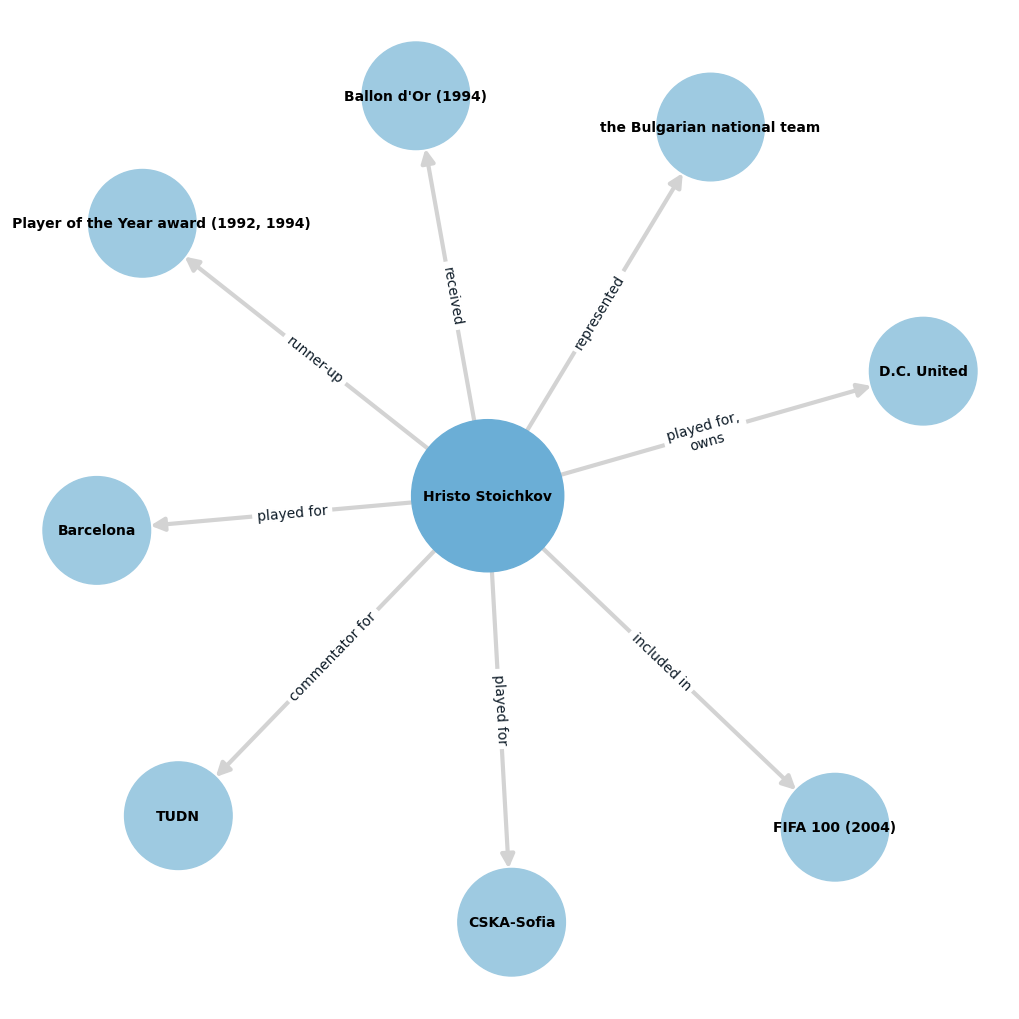

In [8]:
# %load_ext autoreload
# %autoreload 2

from knowledgeGraph import KnowledgeGraph, KnowledgeGraphVisualizer

knowledgeGraph = KnowledgeGraph(entities, relationships)

knowledgeGraphVisualizer = KnowledgeGraphVisualizer(knowledgeGraph)
knowledgeGraphVisualizer.visualize(highlight_entities=["Hristo Stoichkov"])

##### Using GraphViz

In [207]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()
# Add nodes 1 and 2
dot.node('1')
dot.node('2')

# Add edge between 1 and 2
dot.edges(['12'])
# Visualize the graph
dot

ModuleNotFoundError: No module named 'graphviz'